# Task 1 Kuzushiji Kanji Classification
- 61070278
- 61070306
- 61070365

In [1]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
X = np.load('train-images.npy')
y = np.load('train-labels.npy')

0


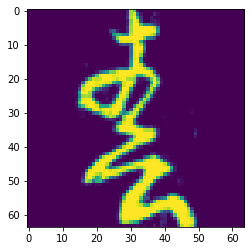

In [3]:
print(y[0])
plt.figure()
plt.imshow(X[0]);

# Preprocessing

In [4]:
# ทำการ reshape ข้อมูล ปรับให้เป็น 4096 เพราะ 64*64
X_ = X.reshape(-1, 4096)
X_[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [5]:
# ทำการแบ่งแยกข้อมูลเป็นส่วน train และ validation 
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.20, random_state=42)
X_train.shape

(81100, 4096)

# PCA
ใช้ PCA ในการลดขนาดข้อมูล

In [6]:
# pca = PCA(n_components=0.99)
pca = PCA(n_components=0.95)

In [7]:
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [8]:
X_train_pca.shape

(81100, 550)

In [9]:
X_test_pca = pca.transform(X_test)

In [10]:
X_test_pca.shape

(20276, 550)

# KNN

### Gridsearch
ใช้ gridsearch ในการหา hyperparameter ที่ให้ค่า loss ที่น้อยที่สุด โดยจะทำการหาสองตัวได้แก่ K และ weight options

In [11]:
k_range = list(range(3, 20, 2))
print(k_range)

[3, 5, 7, 9, 11, 13, 15, 17, 19]


In [12]:
weight_options = ['uniform', 'distance']

In [13]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']}


In [14]:
knn = KNeighborsClassifier()

#### scoring = f1_micro
วัดประสิทธิภาพด้วยค่า f1-score แบบ micro เพราะข้อมูล unbalance

In [15]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')
%time grid.fit(X_train_pca, y_train)

Wall time: 35min 11s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [16]:
%time df = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
df

Wall time: 30.9 ms


,mean_test_score,std_test_score,params
0,0.683514,0.001629,"{'n_neighbors': 3, 'weights': 'uniform'}"
1,0.728002,0.002024,"{'n_neighbors': 3, 'weights': 'distance'}"
2,0.680912,0.002700,"{'n_neighbors': 5, 'weights': 'uniform'}"
3,0.718582,0.002378,"{'n_neighbors': 5, 'weights': 'distance'}"
4,0.671652,0.004364,"{'n_neighbors': 7, 'weights': 'uniform'}"
5,0.705302,0.003635,"{'n_neighbors': 7, 'weights': 'distance'}"
6,0.661702,0.003730,"{'n_neighbors': 9, 'weights': 'uniform'}"
7,0.692306,0.003240,"{'n_neighbors': 9, 'weights': 'distance'}"
8,0.651677,0.004363,"{'n_neighbors': 11, 'weights': 'uniform'}"
9,0.682121,0.003355,"{'n_neighbors': 11, 'weights': 'distance'}"


ทำการพล็อตกราฟ F1_micro ในแต่ละ k โดยจะแบ่งเป็น 2 กราฟได้แก่
- weights: uniform
- weights: distance

In [17]:
idx_uniform = np.arange(0, 18, 2)
df.iloc[idx_uniform]

,mean_test_score,std_test_score,params
0,0.683514,0.001629,"{'n_neighbors': 3, 'weights': 'uniform'}"
2,0.680912,0.002700,"{'n_neighbors': 5, 'weights': 'uniform'}"
4,0.671652,0.004364,"{'n_neighbors': 7, 'weights': 'uniform'}"
6,0.661702,0.003730,"{'n_neighbors': 9, 'weights': 'uniform'}"
8,0.651677,0.004363,"{'n_neighbors': 11, 'weights': 'uniform'}"
10,0.642380,0.003698,"{'n_neighbors': 13, 'weights': 'uniform'}"
12,0.633453,0.004389,"{'n_neighbors': 15, 'weights': 'uniform'}"
14,0.625808,0.004351,"{'n_neighbors': 17, 'weights': 'uniform'}"
16,0.618841,0.004885,"{'n_neighbors': 19, 'weights': 'uniform'}"


Text(0.5, 1.0, 'weights: uniform')

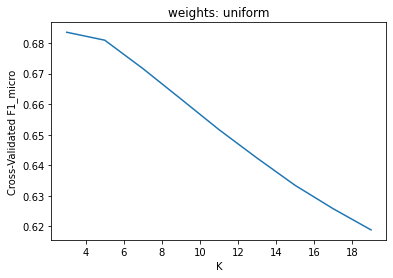

In [18]:
plt.plot(np.arange(3, 20, 2), df['mean_test_score'].loc[idx_uniform])
plt.xlabel('K')
plt.ylabel('Cross-Validated F1_micro')
plt.title('weights: uniform')

In [19]:
idx_distance = np.arange(1, 18, 2)
df.iloc[idx_distance]

,mean_test_score,std_test_score,params
1,0.728002,0.002024,"{'n_neighbors': 3, 'weights': 'distance'}"
3,0.718582,0.002378,"{'n_neighbors': 5, 'weights': 'distance'}"
5,0.705302,0.003635,"{'n_neighbors': 7, 'weights': 'distance'}"
7,0.692306,0.003240,"{'n_neighbors': 9, 'weights': 'distance'}"
9,0.682121,0.003355,"{'n_neighbors': 11, 'weights': 'distance'}"
11,0.671862,0.003584,"{'n_neighbors': 13, 'weights': 'distance'}"
13,0.662602,0.004437,"{'n_neighbors': 15, 'weights': 'distance'}"
15,0.652984,0.004186,"{'n_neighbors': 17, 'weights': 'distance'}"
17,0.645043,0.004547,"{'n_neighbors': 19, 'weights': 'distance'}"


Text(0.5, 1.0, 'weights: distance')

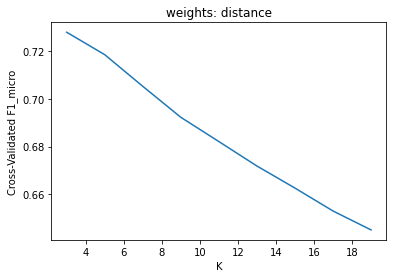

In [20]:
plt.plot(np.arange(3, 20, 2), df['mean_test_score'].loc[idx_distance])
plt.xlabel('K')
plt.ylabel('Cross-Validated F1_micro')
plt.title('weights: distance')

In [21]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7280024660912454
{'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, weights='distance')


KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train best estimator
สร้างโมเดลด้วย hyperparameter ที่ดีที่สุดที่ได้จากการทำ gridsearch

In [22]:
knn = grid.best_estimator_
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [23]:
y_pred = knn.predict(X_test_pca)

In [24]:
print(f1_score(y_test, y_pred, average='micro'))

0.7416157032945354


In [25]:
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

(0.7416157032945354, 0.7416157032945354, 0.7416157032945354, None)


In [26]:
print('accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('precision: %.5f' % precision_score(y_test, y_pred, average="micro"))
print('recall: %.5f' % recall_score(y_test, y_pred, average="micro"))
print('f1_score: %.5f' % f1_score(y_test, y_pred, average="micro"))

accuracy: 0.74162
precision: 0.74162
recall: 0.74162
f1_score: 0.74162


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.69841   0.84615   0.76522        52
           1    0.00000   0.00000   0.00000         3
           2    0.80000   0.70588   0.75000        17
           3    0.95652   0.84615   0.89796        26
           4    0.91667   0.50000   0.64706        22
           5    0.83851   0.93750   0.88525       144
           6    1.00000   0.42857   0.60000         7
           7    1.00000   0.42857   0.60000         7
           8    0.61538   0.47059   0.53333        17
           9    0.85714   0.78261   0.81818        23
          10    0.66447   0.87826   0.75655       115
          11    0.81250   0.90909   0.85809       143
          12    0.58621   0.77273   0.66667        22
          13    0.00000   0.00000   0.00000         8
          14    0.66520   0.92073   0.77238       164
          15    0.77778   0.43750   0.56000        16
          16    0.88764   0.89773   0.89266        88
          17    0.88421   0

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classif

---

# Test with Test data

In [28]:
test_dataset = np.load('test-images.npy')

In [29]:
test_dataset = test_dataset.reshape(-1, 4096)
test_dataset[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

ต้องเตรียมข้อมูลให้เหมือนกับชุด Training

In [30]:
# PCA
test_dataset_pca = pca.transform(test_dataset)

In [31]:
test_dataset_pca.shape

(25344, 550)

In [32]:
# KNN
y_pred = knn.predict(test_dataset_pca)

## Save the prediction 
นำผลทำนายมาเซฟไว้ในไฟล์ csv

In [33]:
index = np.arange(1, len(y_pred)+1)

In [34]:
d = {'ImageId': index, 'ClassId': y_pred}
df = pd.DataFrame(data=d)

In [35]:
df

,ImageId,ClassId
0,1,972
1,2,20
2,3,241
3,4,52
4,5,350
...,...,...
25339,25340,16
25340,25341,854
25341,25342,367
25342,25343,102


In [37]:
df.to_csv('predict_KNN.csv', index=False)